### 1) Importing modules  & Data aqusition 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# data_dir = os.getenv('C:/Users/z002t5wz/aiffel')
train_data_path = 'C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data/train.csv'
test_data_path = 'C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data/test.csv'

origin_train = pd.read_csv(train_data_path)
origin_test = pd.read_csv(test_data_path)

### 2) Reviewing Data

In [26]:
origin_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [27]:
origin_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
origin_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

#### 전처리: 모델학습을위해 실수 또는 정수 자료형으로, object type의 train['date']를 int로 변환

In [29]:
origin_train['date'] = origin_train['date'].apply(lambda i: i[:6]).astype(int)
origin_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [30]:
del origin_train['id']
print(origin_train.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [31]:
train =origin_train.copy()

#### 전처리: target data 삭제

In [32]:
y = train['price']  #target

del train['price']
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [33]:
origin_test['date'] = origin_test['date'].apply(lambda i: i[:6]).astype(int)
del origin_test['id']

print(origin_test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [34]:
test = origin_test.copy() # data를 int로 변경하고 id를 삭제한 df을 origin으로 설정하고 나중을 위해 저장해둠

In [35]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

Text(0.5, 1.0, 'Distribution of Housing Price')

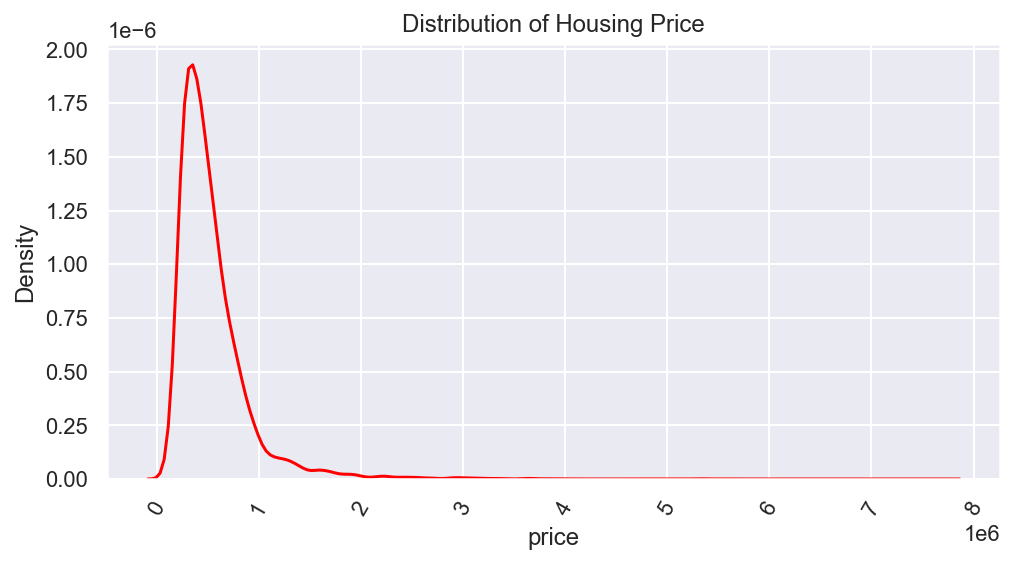

In [36]:
plt.figure(figsize=[8,4])
sns.distplot(y,hist=False,label='train',color='red')
plt.xticks(rotation=60)
plt.title("Distribution of Housing Price")

In [37]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

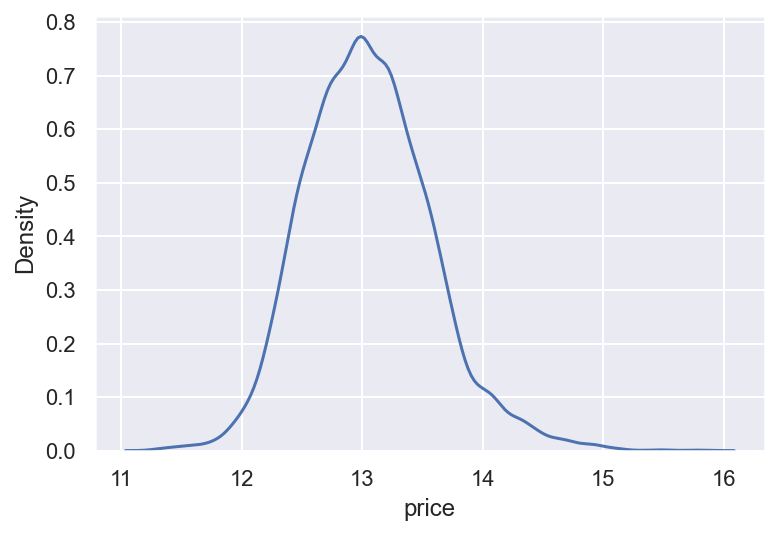

In [38]:
sns.kdeplot(y)
plt.show()

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

#### 변수들의 상관관계시각화

#### 상관관계분석<br>각 변수들과의 상관관계는 어떤지 확인...
train[date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']의<br> 열값을 골라내고 상관관계분석하기


#### 변수들의 상관관계 분석

In [44]:
origin_train_corr_data = origin_train[['price','date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']].corr().round(2)
origin_train_corr_data

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00,0.01,0.32,0.53,0.70,0.10,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.14,-0.05,0.30,0.02,0.59,0.09
date,0.01,1.00,-0.00,-0.02,-0.02,0.01,-0.02,-0.00,0.01,-0.05,-0.02,-0.02,-0.01,0.00,-0.02,-0.00,-0.03,0.00,-0.01,0.00
bedrooms,0.32,-0.00,1.00,0.53,0.60,0.03,0.19,-0.00,0.09,0.03,0.38,0.49,0.32,0.16,0.02,-0.16,-0.01,0.14,0.41,0.03
bathrooms,0.53,-0.02,0.53,1.00,0.76,0.09,0.51,0.08,0.19,-0.13,0.67,0.69,0.28,0.50,0.07,-0.21,0.02,0.23,0.57,0.09
sqft_living,0.70,-0.02,0.60,0.76,1.00,0.18,0.36,0.11,0.28,-0.05,0.76,0.88,0.43,0.32,0.06,-0.20,0.05,0.25,0.76,0.18
sqft_lot,0.10,0.01,0.03,0.09,0.18,1.00,0.00,0.03,0.08,-0.00,0.12,0.19,0.02,0.06,-0.00,-0.13,-0.08,0.23,0.15,0.73
floors,0.26,-0.02,0.19,0.51,0.36,0.00,1.00,0.03,0.03,-0.26,0.46,0.53,-0.24,0.49,0.01,-0.06,0.05,0.13,0.29,-0.01
waterfront,0.27,-0.00,-0.00,0.08,0.11,0.03,0.03,1.00,0.39,0.01,0.09,0.08,0.07,-0.03,0.10,0.03,-0.01,-0.04,0.09,0.03
view,0.40,0.01,0.09,0.19,0.28,0.08,0.03,0.39,1.00,0.05,0.25,0.17,0.27,-0.06,0.11,0.09,0.01,-0.07,0.28,0.08
condition,0.04,-0.05,0.03,-0.13,-0.05,-0.00,-0.26,0.01,0.05,1.00,-0.14,-0.15,0.18,-0.37,-0.06,0.00,-0.02,-0.11,-0.09,-0.00


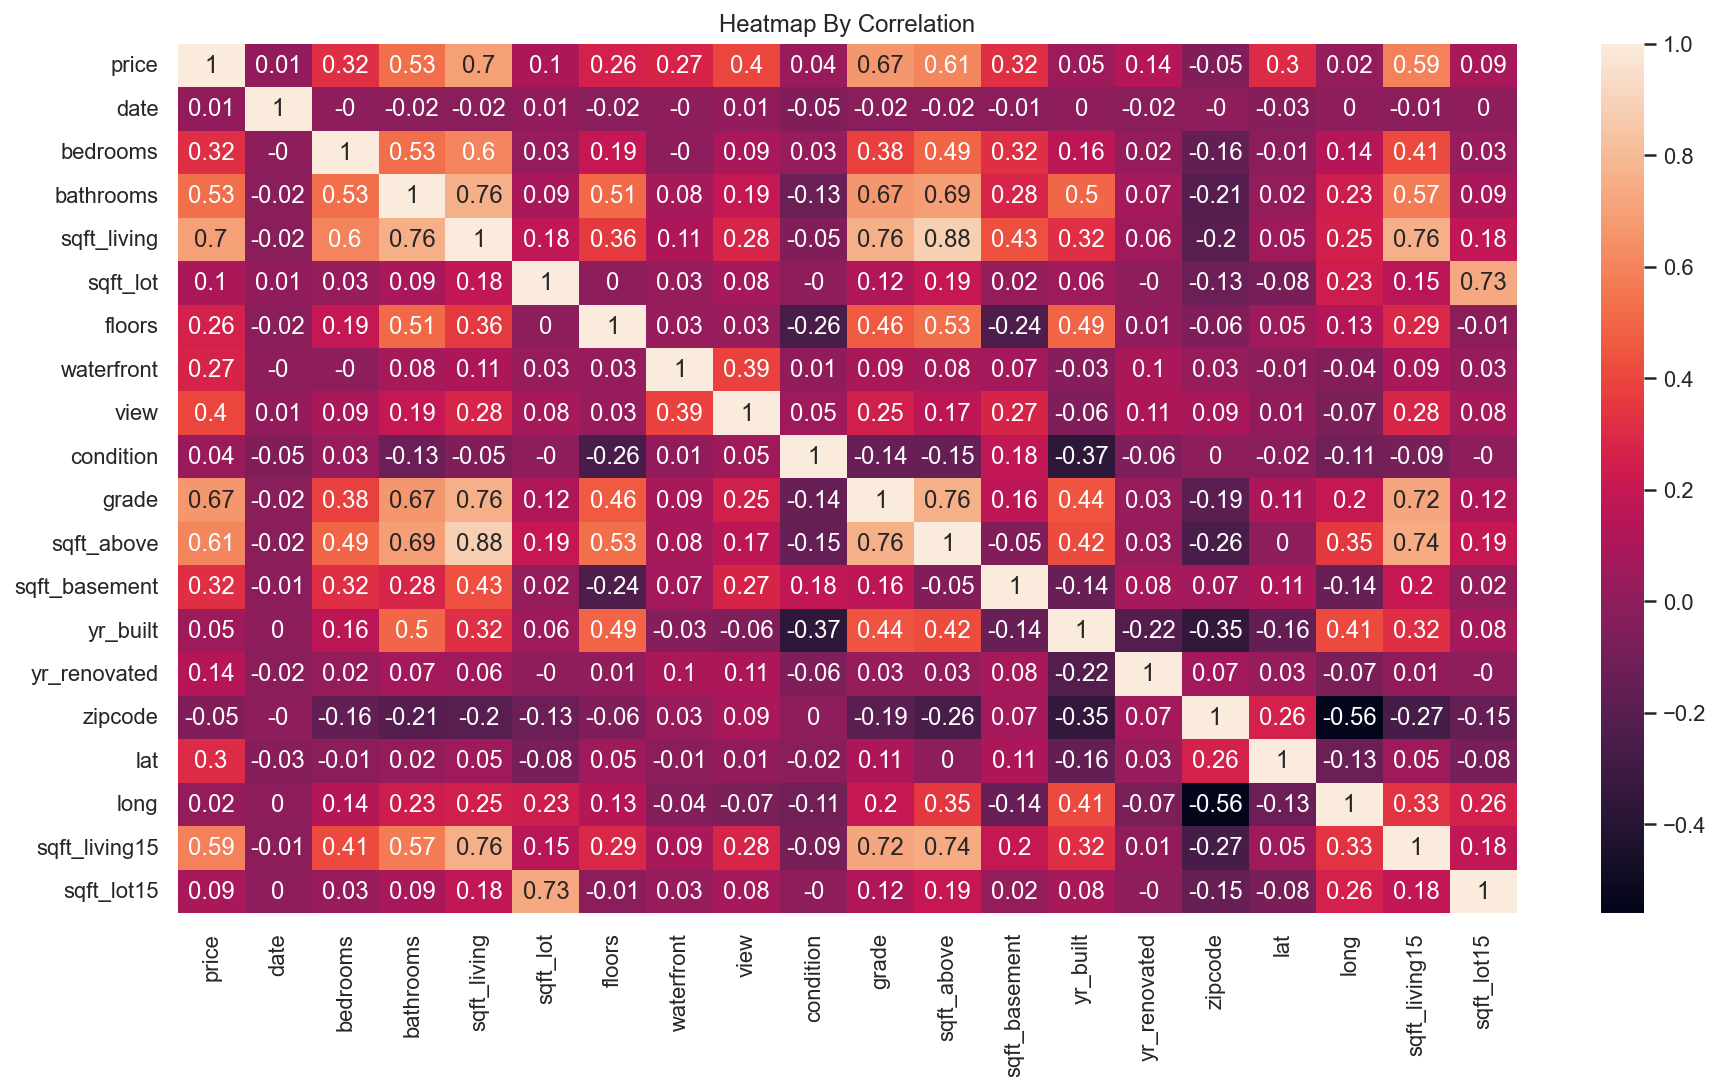

In [45]:
# 상관관계분석 결과 시각화하기 
'''각 인자들의 상관관계가 높다고 해서 인과관계가 있다는 것은 아님을 유의'''

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data = origin_train_corr_data, annot=True)
plt.title('Heatmap By Correlation')
plt.show()

In [46]:
corr_sorted = origin_train_corr_data.loc['price']

In [47]:
corr_sorted.sort_index(ascending=False)

zipcode         -0.05
yr_renovated     0.14
yr_built         0.05
waterfront       0.27
view             0.40
sqft_lot15       0.09
sqft_lot         0.10
sqft_living15    0.59
sqft_living      0.70
sqft_basement    0.32
sqft_above       0.61
price            1.00
long             0.02
lat              0.30
grade            0.67
floors           0.26
date             0.01
condition        0.04
bedrooms         0.32
bathrooms        0.53
Name: price, dtype: float64

In [48]:
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [49]:
# # train data
# del train['sqft_lot']
# del train['sqft_living']
# del train['zipcode']
# del train['date']

In [50]:
# # test data
# del test['sqft_lot']
# del test['sqft_living']
# del test['zipcode']
# del test['date']

#### 변수에 대한 고찰
sqft_lot15 & sqft_living15의 경우 sqft_lot & sqft_lot15를 2015년에 새로 업데이트한 변수이므로 중복매개변수일 수 있겠다라는 생각에 삭제 후 모델링을 해보았으나 RSME값이 줄어들지 않았다.
zipcode의 경우 lat & long의 값이 더 정확한 매개변수이므로 삭제하여 모델링하였으나 RSME값이 줄어들지 않았다.

In [51]:
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [52]:
test.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [53]:
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [54]:
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


## 3) 모델학습

####     RMSE 함수

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

#### XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor 네 가지 모델

In [57]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [58]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 초기값
random_state=2020        # 고정값을 세팅 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


In [59]:
gboost.__class__.__name__ # 각 모델의 이름은 다음과 같이 클래스의 __name__ 속성에 접근

'GradientBoostingRegressor'

#### get_scores함수 생성

In [60]:
def get_scores(models, train, y):
        """models:해당모델, train:데이터, y:target"""
        df = {}

        for model in models:
            # 모델 이름 획득
            model_name = model.__class__.__name__

            # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
            X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

            # 모델 학습
            model.fit(X_train, y_train)

            # 예측
            y_pred = model.predict(X_test)

            # 예측 결과의 rmse값 저장
            df[model_name] = rmse(y_test, y_pred)

            # data frame에 저장
            score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

        return  score_df
    


In [61]:
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125367.297375
LGBMRegressor,111920.367359
XGBRegressor,110318.670409


	RMSE (모든변수포함)
GradientBoostingRegressor	128360.196497
RandomForestRegressor	125367.297375
LGBMRegressor	111920.367359
XGBRegressor	110318.670409

## 4) 튜닝

In [91]:
from sklearn.model_selection import GridSearchCV

In [170]:
# param_grid에 탐색할 LightGBM 관련 하이퍼 파라미터를 넣어서 준비 


print(model.get_params())

''' 
'max_depth': 각 트리의 최대 깊이, 학습시간에 영향 클 수록 데이터 fitting이 작된지만 overfitting이 될 가능성, 3~ 12의 값 사용
i)  'max_depth': [1, 10]
ii)  'max_depth': [-1]
iii)  'max_depth': [3, 12]

'''
param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [10, 11,12,13,14],
    'num_leaves': [4, 16, 256, 1000],
    'learning_rate':[0.1, 0.01]
    
}

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 2020, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [171]:
# 모델을 준비. 모델은 LightGBM(lgbm)
model = LGBMRegressor(random_state=random_state)

In [172]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 11, 12, 13, 14],
                         'n_estimators': [100, 500, 1000, 1500],
                         'num_leaves': [4, 16, 256, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [173]:
#실험에 대한 결과
grid_model.cv_results_

{'mean_fit_time': array([ 0.08939567,  0.14660287,  0.49710264,  0.64180164,  0.27123852,
         0.50949063,  1.45392199,  1.77839832,  0.48799143,  0.91985025,
         2.90243196,  3.51598301,  0.77535658,  1.49745235,  4.29938068,
         5.05492573,  0.08699741,  0.15619597,  0.57957859,  0.68653235,
         0.27959929,  0.5120008 ,  1.84818239,  2.13302393,  0.52622256,
         1.01664143,  3.39364905,  3.85088625,  0.77487688,  1.48642421,
         4.82006311,  5.67510924,  0.08779902,  0.15789208,  0.63898873,
         0.77719989,  0.28453994,  0.51091328,  2.053548  ,  2.38822103,
         0.53891363,  1.01972399,  3.76626234,  4.33788099,  0.78694067,
         1.41373324,  5.47458501,  6.38431993,  0.08619809,  0.15239768,
         0.67743487,  0.83235731,  0.28562574,  0.52739663,  2.27231975,
         2.60761285,  0.52879701,  1.02080822,  4.16432586,  4.85118928,
         0.78188243,  1.41342254,  6.18715277,  6.94083595,  0.08527989,
         0.1533936 ,  0.72813916, 

테스트점수: 'mean_test_score': array([-0.17974603, -0.17912826, -0.03545062, -0.0352382 ]),

In [174]:
#파라미터의 조합
params = grid_model.cv_results_['params']
params

[{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 4},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 16},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 256},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 1000},
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 4},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 500,
  'num_leaves': 16},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 500,
  'num_leaves': 256},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 500,
  'num_leaves': 1000},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 1000,
  'num_leaves': 4},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 1000,
  'num_leaves': 16},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 1000,
  'num_leaves': 256},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_

In [175]:
#각조합에 대한 점수
score = grid_model.cv_results_['mean_test_score']
score

array([-0.03780816, -0.0280474 , -0.02771139, -0.02776233, -0.02866757,
       -0.02595804, -0.02813737, -0.02821412, -0.02673977, -0.02625674,
       -0.02843316, -0.02854416, -0.02614587, -0.0265357 , -0.02856853,
       -0.02868155, -0.03780816, -0.02818439, -0.02770699, -0.02799856,
       -0.02866757, -0.02606319, -0.02819375, -0.02846762, -0.02673977,
       -0.02626212, -0.02855685, -0.02881932, -0.02614587, -0.02646312,
       -0.02868617, -0.02893359, -0.03780816, -0.02803032, -0.02783505,
       -0.02812662, -0.02866757, -0.02600441, -0.02836658, -0.02871152,
       -0.02673977, -0.02611253, -0.02864357, -0.02900001, -0.02614587,
       -0.02643877, -0.02873764, -0.0290913 , -0.03780816, -0.02802331,
       -0.027966  , -0.02846863, -0.02866757, -0.02599657, -0.02843835,
       -0.02906976, -0.02673977, -0.02608622, -0.02865968, -0.02933709,
       -0.02614587, -0.02635855, -0.02872166, -0.02939699, -0.03780816,
       -0.02802331, -0.02806128, -0.02846551, -0.02866757, -0.02

### params 데이터 프레임을 만들고 최적의 성능을 내는 하이퍼 파라미터의 조합을 찾기

In [176]:
pd.DataFrame(params)

,learning_rate,max_depth,n_estimators,num_leaves
0,0.10,10,100,4
1,0.10,10,100,16
2,0.10,10,100,256
3,0.10,10,100,1000
4,0.10,10,500,4
...,...,...,...,...
155,0.01,14,1000,1000
156,0.01,14,1500,4
157,0.01,14,1500,16
158,0.01,14,1500,256


In [177]:
results = pd.DataFrame(params)
results['score'] = score

results

,learning_rate,max_depth,n_estimators,num_leaves,score
0,0.10,10,100,4,-0.037808
1,0.10,10,100,16,-0.028047
2,0.10,10,100,256,-0.027711
3,0.10,10,100,1000,-0.027762
4,0.10,10,500,4,-0.028668
...,...,...,...,...,...
155,0.01,14,1000,1000,-0.028025
156,0.01,14,1500,4,-0.035152
157,0.01,14,1500,16,-0.027053
158,0.01,14,1500,256,-0.027528


In [188]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,learning_rate,max_depth,n_estimators,num_leaves,score,RMSE
0,0.10,10,100,4,-0.037808,0.194443
1,0.10,10,100,16,-0.028047,0.167474
2,0.10,10,100,256,-0.027711,0.166467
3,0.10,10,100,1000,-0.027762,0.166620
4,0.10,10,500,4,-0.028668,0.169315
...,...,...,...,...,...,...
155,0.01,14,1000,1000,-0.028025,0.167408
156,0.01,14,1500,4,-0.035152,0.187490
157,0.01,14,1500,16,-0.027053,0.164478
158,0.01,14,1500,256,-0.027528,0.165916


In [189]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
0,0.10,10,100,4,-0.037808,0.194443
1,0.10,10,100,16,-0.028047,0.167474
2,0.10,10,100,256,-0.027711,0.166467
3,0.10,10,100,1000,-0.027762,0.166620
4,0.10,10,500,4,-0.028668,0.169315
...,...,...,...,...,...,...
155,0.01,14,1000,1000,-0.028025,0.167408
156,0.01,14,1500,4,-0.035152,0.187490
157,0.01,14,1500,16,-0.027053,0.164478
158,0.01,14,1500,256,-0.027528,0.165916


In [191]:
results = results.sort_values('RMSLE')
results.head(20)

,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
5,0.1,10,500,16,-0.025958,0.161115
69,0.1,14,500,16,-0.025958,0.161115
53,0.1,13,500,16,-0.025997,0.161235
37,0.1,12,500,16,-0.026004,0.161259
21,0.1,11,500,16,-0.026063,0.161441
57,0.1,13,1000,16,-0.026086,0.161512
73,0.1,14,1000,16,-0.026088,0.161517
41,0.1,12,1000,16,-0.026113,0.161594
44,0.1,12,1500,4,-0.026146,0.161697
12,0.1,10,1500,4,-0.026146,0.161697


#### cases of overfitting: 
 - learning_rate이 너무 작을 경우
 - max_depth가 너무 깊을 경우 (>15)
 - num_leaves 가 너무 많을 경우: (>16)
 - n_estimators (>500)

In [192]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.
"""

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

## 제출

결과출력하기

In [194]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [10],
    'num_leaves': [16],
    'learning_rate':[0.1]
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,learning_rate,max_depth,n_estimators,num_leaves,score,RMSLE
0,0.1,10,500,16,-0.025958,0.161115


In [195]:
# 해당 파라미터로 구성된 모델을 준비하고, 학습 후 예측 결과를 생성
model = LGBMRegressor(max_depth=12, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.13383579, 13.09868435, 14.13124797, ..., 13.00776362,
       12.7104557 , 12.96575169])

In [196]:
# 원래 스케일로 변경
prediction = np.expm1(prediction)
prediction

array([ 505768.23415687,  488298.55815096, 1371269.125231  , ...,
        445860.48885742,  331191.71470035,  427517.00786005])

In [197]:
data_dir = 'C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data'
submission_path = join(data_dir, 'sample_submission.csv')
submission_path
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [198]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.057682e+05
1,15036,4.882986e+05
2,15037,1.371269e+06
3,15038,3.042273e+05
4,15039,3.302173e+05


In [199]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.161115')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.161115.csv


제출함수만들기

In [200]:
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = 'C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [201]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.164727')

C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164727.csv saved!


#### 회고
    1. 신경망의 매개변수에 대한 고찰이 더 필요할 것으로 보입니다. 
     변수에 대한 고찰
    - sqft_lot15 & sqft_living15의 경우 sqft_lot & sqft_lot15를 2015년에 새로 업데이트한 변수이므로 중복매개변수일 수 있겠다라는 생각에 삭제 후 
      모델링을 해보았으나 RSME값이 줄어들지 않았다.
    - zipcode의 경우 lat & long의 값이 더 정확한 매개변수이므로 삭제하여 모델링하였으나 RSME값이 줄어들지 않았다.
     
    2. 하이퍼 파라미터의 경우 파라미터의 수준이 깊거나 많을 경우 overfitting이 되는 경우들을 확인하였습니다.
      cases of overfitting: 
     - learning_rate이 너무 작을 경우
     - max_depth가 너무 깊을 경우 (>15)
     - num_leaves 가 너무 많을 경우: (>16)
     - n_estimators (>500)
     
    3. Kaggle private Score: 115234.78481

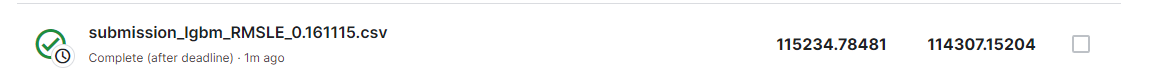

In [203]:
from IPython.display import Image

Image("C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data/ranking.png")

![ranking]('C:/Users/z002t5wz/aiffel/kaggle_kakr_housing/data/ranking.png')